In [1]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
sns.set()
from ipywidgets import interact
import tqdm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Obtenir les data 

Requête pour les appartements :

http://www.seloger.com/list.htm?ci=750113%2C750114%2C750115%2C920049&idtt=1&idtypebien=1&naturebien=1&nb_pieces=2&pxmax=1300&si_meuble=0&surfacemax=50&surfacemin=35&tri=initial&bd=CartoToList_SL

In [82]:
s = requests.Session()
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.120 Safari/537.36"}
url = "http://www.seloger.com/list.htm?ci=750113%2C750114%2C750115%2C920049&idtt=1&idtypebien=1&naturebien=1&nb_pieces=2&pxmax=1300&si_meuble=0&surfacemax=50&surfacemin=35&tri=initial&bd=CartoToList_SL"
r = s.get(url, headers=headers)
r

<Response [200]>

On parse :

In [83]:
soup = BeautifulSoup(r.text, 'html.parser')

Ceci nous permet d'obtenir deux choses : les liens vers les autres pages et les data des annonces, qui sont directement dans la page.

## prototype data une page

In [84]:
len(soup.find_all('script'))

39

In [85]:
@interact
def browse_script_tags(n=(0, len(soup.find_all('script')) - 1)):
    "Browse script tags."
    print(soup.find_all('script')[n])

Widget Javascript not detected.  It may not be installed or enabled properly.


In [86]:
data = []
for item in soup.find_all('script'):
    if 'ava_data' in item.text:
        data.append(item.text)
len(data)

2

In [87]:
raw_data = data[1].strip().replace('\r\n', '').split('=')[1][:-21].strip()
raw_data

'{    "search" : {        "levier" : "Recherche depuis la liste",        "nbresults" : "162",        "nbpage" : "1",        "typedetransaction" : ["location"],        "nbpieces" : ["2"],        "typedebien" : ["Appartement"],        "pays" : "FR",        "nbchambres" : [],        "budget" : {            "min" : "",            "max" : "1300"        },        "surface": {            "min" : "35",            "max" : "50"        },        "surface_terrain" : {            "min" : "",            "max" : ""        },        "type" : [            {                "name" : "Nouvelle recherche",                "value" : true            },            {                "name" : "Derniere recherche",                "value" : false            },            {                "name" : "Recherche enregistrée",                "value" : false            }        ],        "etage" : {            "min" : "",            "max" : ""        },        "tri" : {            "criteria" : "Sélection",            "dir

In [88]:
struct = json.loads(raw_data)

In [89]:
len(struct['products'])

22

In [90]:
df = pd.DataFrame(struct['products'])

In [91]:
df.head()

,affichagetype,codeinsee,codepostal,cp,etage,idagence,idannonce,idannuaire,idbandeau,idtiers,...,nb_pieces,position,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction
0,"[{'name': 'list', 'value': True}]",750113,75013,75013,23,1097,123581089,NaN,NaN,136882,...,2,0,901,AD:AC:AG:BB:BX:AW,0,0,0,"41,47",Appartement,[location]
1,"[{'name': 'list', 'value': True}]",750115,75015,75015,1,882,123358273,NaN,NaN,1859,...,2,1,950,AD:AC:BB:AW,0,0,1,35,Appartement,[location]
2,"[{'name': 'list', 'value': True}]",750115,75015,75015,1,35474,122467717,NaN,NaN,100005,...,2,2,1148,AD:AC:AG:BC:AW,0,0,0,40,Appartement,[location]
3,"[{'name': 'list', 'value': True}]",750115,75015,75015,4,1509,123616421,NaN,NaN,66095,...,2,3,1215,AD:AC:BC:BX:AW,0,0,1,"45,37",Appartement,[location]
4,"[{'name': 'list', 'value': True}]",750114,75014,75014,3,51474,123663337,NaN,NaN,21573,...,2,4,1183,AD:AC:AG:BC:AW,0,0,1,41,Appartement,[location]


In [92]:
df.tail()

,affichagetype,codeinsee,codepostal,cp,etage,idagence,idannonce,idannuaire,idbandeau,idtiers,...,nb_pieces,position,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction
17,"[{'name': 'list', 'value': True}]",920049,92120,92120,1,2093,123901753,NaN,NaN,4113,...,2,17,986,AD:AC:BX:AW,0,1,0,42,Appartement,[location]
18,"[{'name': 'list', 'value': True}]",920049,92120,92120,7,28649,122072925,NaN,NaN,16365,...,2,18,990,AE:AW,0,0,1,"39,79",Appartement,[location]
19,"[{'name': 'list', 'value': True}]",750113,75013,75013,4,6906,123741373,NaN,NaN,149593,...,2,19,990,-,0,1,0,37,Appartement,[location]
20,"[{'name': 'localexpert', 'value': True}]",NaN,75009,NaN,NaN,42168,NaN,59513,397,16729,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,"[{'name': 'localexpert', 'value': True}]",NaN,75014,NaN,NaN,1149,NaN,54731,977,2362,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
appartment_links = [item.attrs['href'].split('?')[0] for item in soup.find_all('a', class_='c-pa-link')]

In [94]:
len(soup.find_all('a', class_='c-pa-link'))

20

In [95]:
df.shape

(22, 27)

## Toutes les data 

Okay, c'est pas mal mais on veut toutes les data. Comment faire ? Chercher les liens.

In [96]:
links = soup.find('div', class_='pagination-number').find_all('a')

In [97]:
len(links)

8

In [98]:
def get_df_from_url(url):
    """Returns json formatted data from url."""
    r = s.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    data = []
    for item in soup.find_all('script'):
        if 'ava_data' in item.text:
            data.append(item.text)
    assert len(data) > 0
    raw_data = data[0].strip().replace('\r\n', '').split('=')[1][:-21].strip()
    struct = json.loads(raw_data)
    appartment_links = [item.attrs['href'].split('?')[0] for item in soup.find_all('a', class_='c-pa-link')]
    return pd.DataFrame(struct['products']), appartment_links

In [99]:
dfs = [df]
appartment_links_all = [*appartment_links]
for link in tqdm.tqdm(links):
    suburl = link.attrs['href']
    subdf, sublinks = get_df_from_url(suburl)
    dfs.append(subdf)
    for link in sublinks:
        appartment_links_all.append(link)

100%|██████████| 8/8 [00:08<00:00,  1.02it/s]


In [100]:
df = pd.concat(dfs, axis=0, ignore_index=True)

In [101]:
df.head()

,affichagetype,codeinsee,codepostal,cp,etage,idagence,idannonce,idannuaire,idbandeau,idtiers,...,nb_pieces,position,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction
0,"[{'name': 'list', 'value': True}]",750113,75013,75013,23,1097,123581089,NaN,NaN,136882,...,2,0,901,AD:AC:AG:BB:BX:AW,0,0,0,"41,47",Appartement,[location]
1,"[{'name': 'list', 'value': True}]",750115,75015,75015,1,882,123358273,NaN,NaN,1859,...,2,1,950,AD:AC:BB:AW,0,0,1,35,Appartement,[location]
2,"[{'name': 'list', 'value': True}]",750115,75015,75015,1,35474,122467717,NaN,NaN,100005,...,2,2,1148,AD:AC:AG:BC:AW,0,0,0,40,Appartement,[location]
3,"[{'name': 'list', 'value': True}]",750115,75015,75015,4,1509,123616421,NaN,NaN,66095,...,2,3,1215,AD:AC:BC:BX:AW,0,0,1,"45,37",Appartement,[location]
4,"[{'name': 'list', 'value': True}]",750114,75014,75014,3,51474,123663337,NaN,NaN,21573,...,2,4,1183,AD:AC:AG:BC:AW,0,0,1,41,Appartement,[location]


In [102]:
df.shape

(179, 27)

# Formater la DF 

In [103]:
df.columns

Index(['affichagetype', 'codeinsee', 'codepostal', 'cp', 'etage', 'idagence',
       'idannonce', 'idannuaire', 'idbandeau', 'idtiers', 'idtypechauffage',
       'idtypecommerce', 'idtypecuisine', 'idtypepublicationsourcecouplage',
       'naturebien', 'nb_chambres', 'nb_photos', 'nb_pieces', 'position',
       'prix', 'produitsvisibilite', 'si_balcon', 'si_sdEau', 'si_sdbain',
       'surface', 'typedebien', 'typedetransaction'],
      dtype='object')

In [104]:
df = df.drop(['affichagetype', 'idannuaire', 'idbandeau', 'idtiers', 'idtypepublicationsourcecouplage'], axis=1)

In [105]:
df = df.dropna(subset=['prix'])

In [106]:
df.shape

(161, 22)

In [107]:
df['link'] = appartment_links_all

In [108]:
df['surface'] = df['surface'].str.replace(',', '.')

In [109]:
numeric_cols = ['prix', 'surface', 'etage', 'nb_chambres', 'si_balcon', 'si_sdEau', 'si_sdbain', 'nb_pieces']


df[numeric_cols] = df[numeric_cols].applymap(pd.to_numeric)

In [110]:
df[numeric_cols]

,prix,surface,etage,nb_chambres,si_balcon,si_sdEau,si_sdbain,nb_pieces
0,901,41.47,23,1,0,0,0,2
1,950,35.00,1,1,0,0,1,2
2,1148,40.00,1,1,0,0,0,2
3,1215,45.37,4,1,0,0,1,2
4,1183,41.00,3,1,0,0,1,2
5,1150,36.00,7,1,0,1,0,2
6,967,39.87,3,1,0,1,0,2
7,870,49.00,4,1,1,1,0,2
8,1120,46.00,0,1,0,0,1,2
9,795,36.00,5,1,0,1,0,2


# Plots heaven! 

On peut tout de suite tracer surface vs prix.

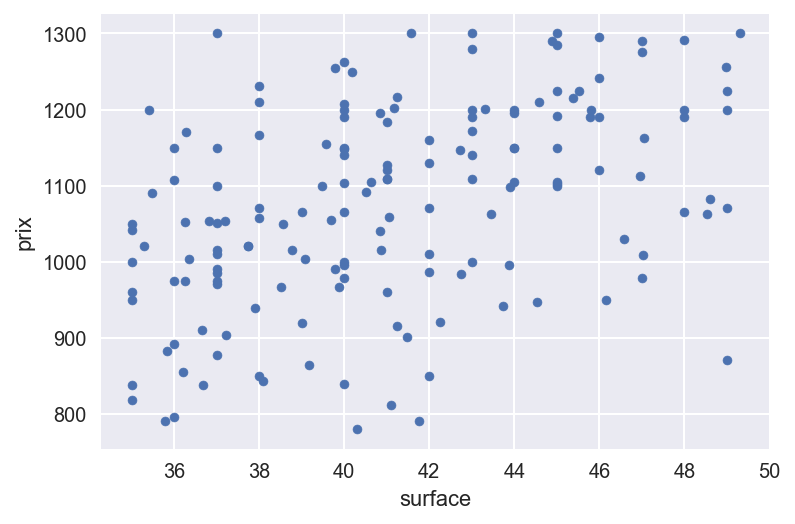

In [111]:
df.plot.scatter(x='surface', y='prix')

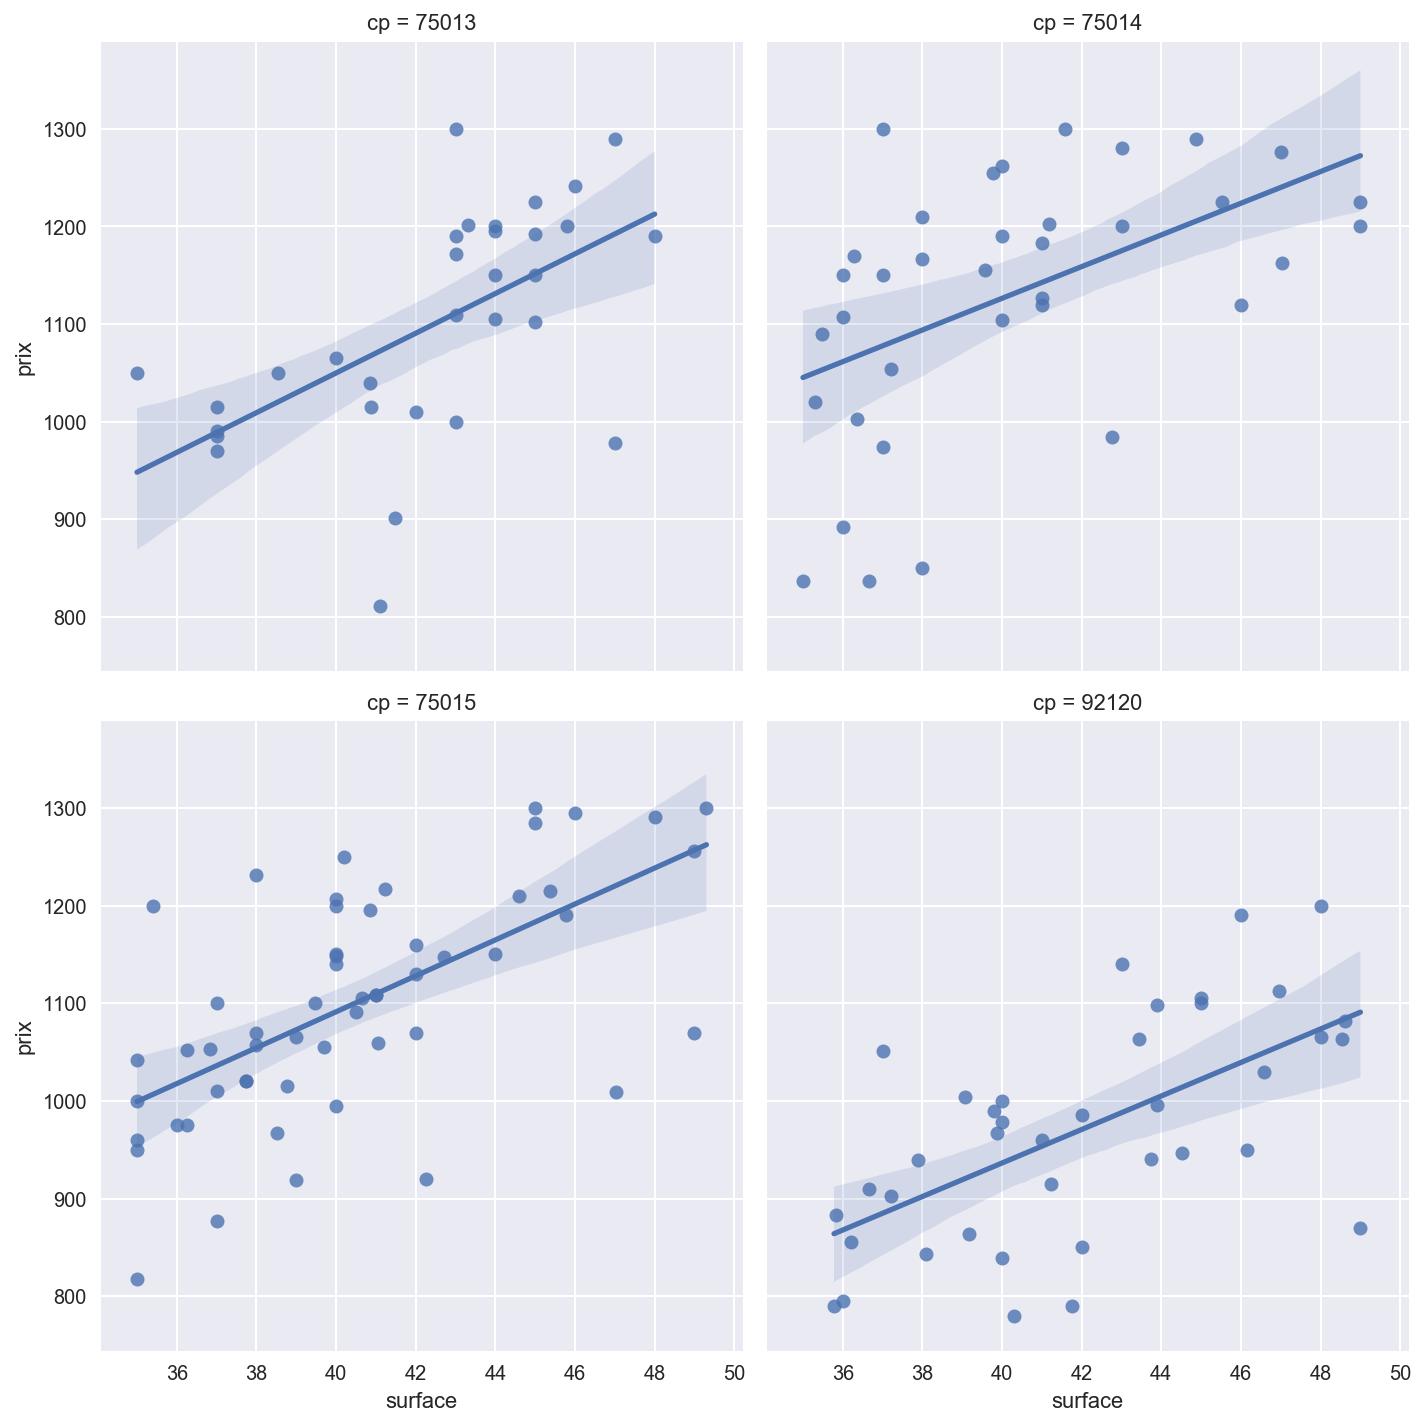

In [112]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="surface", y="prix", col="cp", col_wrap=2,
               truncate=True, size=5, data=df)

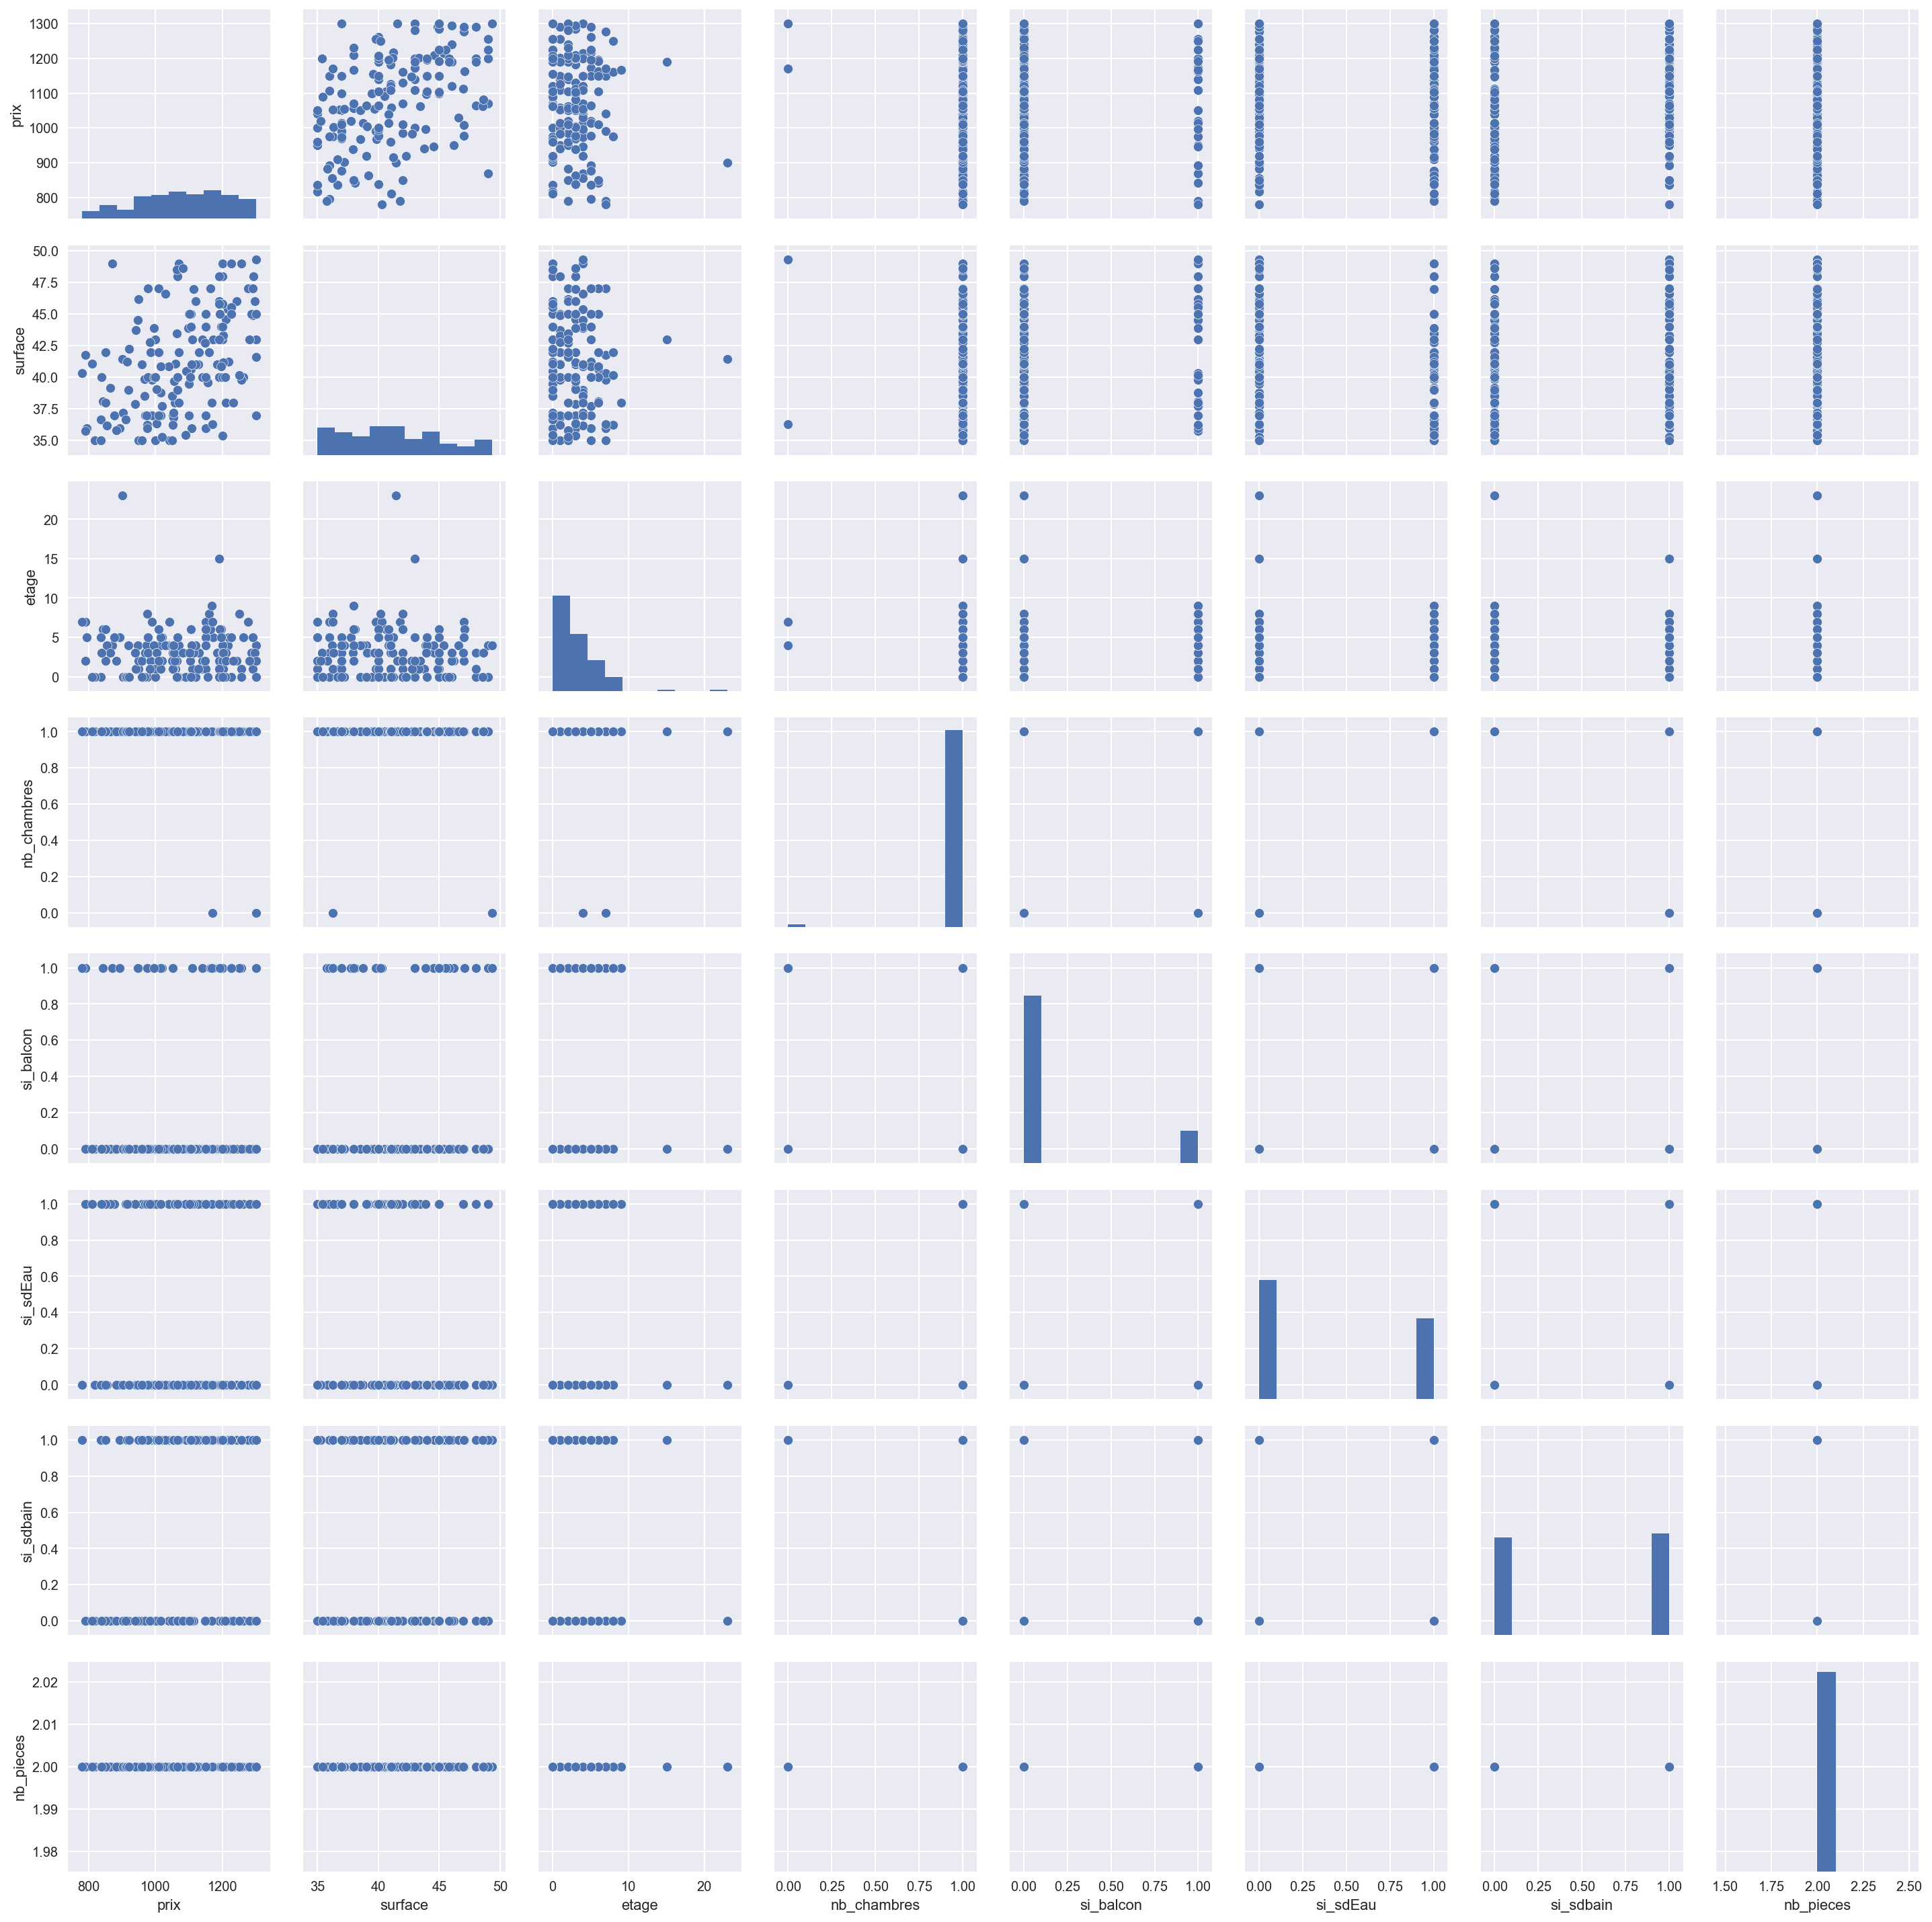

In [113]:
sns.pairplot(df[numeric_cols])

Quelle est l'influence de l'étage ? 

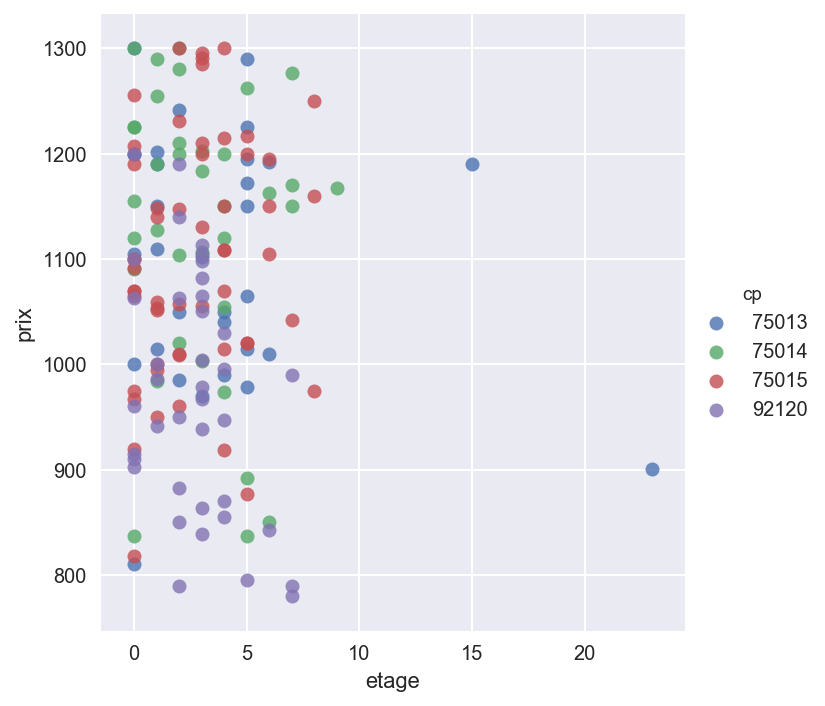

In [115]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="etage", y="prix", hue='cp', fit_reg=False,
               truncate=True, size=5, data=df)

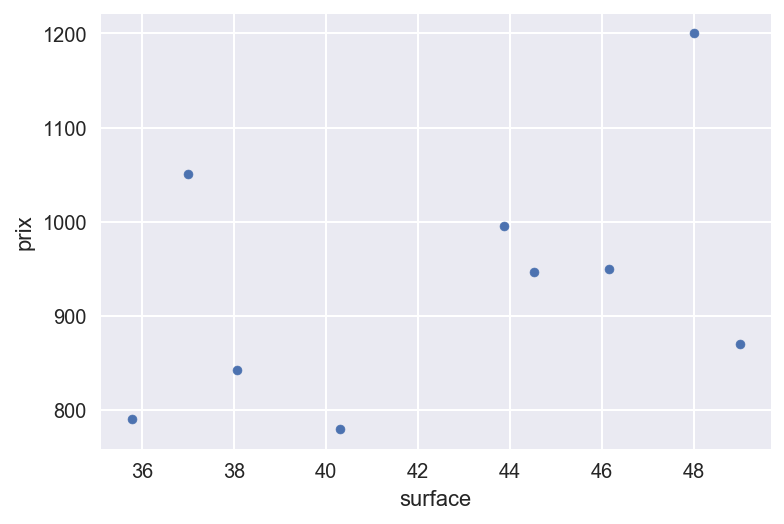

In [116]:
df[(df['si_balcon'] == 1) & (df['cp'] == '92120')].plot.scatter(x='surface', y='prix')

In [117]:
df[(df['si_balcon'] == 1) & (df['cp'] == '92120')]

,codeinsee,codepostal,cp,etage,idagence,idannonce,idtypechauffage,idtypecommerce,idtypecuisine,naturebien,...,position,prix,produitsvisibilite,si_balcon,si_sdEau,si_sdbain,surface,typedebien,typedetransaction,link
7,920049,92120,92120,4,8787,123863339,0,0,séparée,1,...,7,870,AD:AC:AG:BC:AW,1,1,0,49.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
10,920049,92120,92120,2,107264,123792029,central,0,américaine équipée,1,...,10,790,AD:AC:AH:AG:BX:AW,1,1,0,35.78,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
13,920049,92120,92120,2,1477,122557175,0,0,séparée,1,...,13,950,AD:AW,1,0,0,46.16,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
22,920049,92120,92120,7,37238,123504493,0,0,séparée,1,...,0,780,AD:AC:AH:AG:BX:AW,1,0,1,40.31,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
30,920049,92120,92120,3,28649,119164431,individuel,0,séparée,1,...,8,1051,AE:AW,1,0,1,37.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
58,920049,92120,92120,0,28649,122440005,individuel,0,séparée,1,...,14,1200,AE:AW,1,0,1,48.00,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
59,920049,92120,92120,4,1477,122217525,0,0,0,1,...,15,947,AD:AW,1,0,0,44.53,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
79,920049,92120,92120,6,1477,122408763,0,0,0,1,...,13,843,AD:AW,1,0,0,38.08,Appartement,[location],http://www.seloger.com/annonces/locations/appa...
101,920049,92120,92120,4,193688,123179693,gaz,0,0,1,...,13,996,BX:AW,1,1,0,43.88,Appartement,[location],http://www.seloger.com/annonces/locations/appa...


In [124]:
df[(df['si_balcon'] == 1) & (df['cp'] == '92120')].iloc[2]['link']

'http://www.seloger.com/annonces/locations/appartement/montrouge-92/peri-brossolette/122557175.htm'